In [1]:
# import pandas as pd
# from google.colab import files
# uploaded = files.upload()

In [2]:
pip install scikit-plot

In [3]:
# import pandas as pd
# dt = pd.read_csv("/content/amazon_reviews.csv")
# dt

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# uploaded1

In [18]:
import pandas as pd
# from gensim.models import Doc2Vec
# from gensim.models.doc2vec import LabeledSentence
# from gensim import utils
import io
import re
from nltk.corpus import stopwords
# from keras.preprocessing import sequence
import scikitplot.plotters as skplt
import matplotlib.pyplot as plt
from collections import Counter
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
import random

top_words = 8000

def textClean(text):
    try:
      text = re.sub(r"[^A-Za-z0-9]", " ", text)
      text = re.sub(r"([A-Z])", r" \1", text).lower().split() 
      # text = text.lower().split()
      stops = set(stopwords.words("english"))
      text = [w for w in text if not w in stops]
      text = " ".join(text)
      return (text)
    except:
      print(text)
      return "Good"
'''
def create_mlp(dim, regress=False):
	# define our MLP network
	model = Sequential()
	model.add(Dense(8, input_dim=dim, activation="relu"))
	model.add(Dense(4, activation="relu"))
	# check to see if the regression node should be added
	if regress:
		model.add(Dense(1, activation="linear"))
	# return our model
	return model

def create_LSTM(dim):
	
    # define our LSTM network
    max_review_length = dim
    embedding_vecor_length = 32
	
    model = Sequential()
    model.add(Embedding(top_words+2, embedding_vecor_length, input_length=max_review_length))
    model.add(LSTM(100, input_shape=(dim)))
	# return our model
    return model
'''

def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte, ypred)
    plt.show()


def cleanup(text):
    text = textClean(text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text

def clean_data():
    
    # data = pd.read_csv("temp.csv", delimiter = ",")
    # data = pd.read_csv(io.BytesIO(uploaded1['amazon_reviews.csv']))
    # data = pd.read_csv("/content/amazon_reviews.csv")
    data = pd.read_csv("amazon_reviews.csv")
    data_pred = pd.read_csv("Data_Pred.csv")

    missing_rows = []
    for i in range(len(data)):
        if data.loc[i, 'REVIEW_TEXT'] != data.loc[i, 'REVIEW_TEXT']:
            missing_rows.append(i)

    data = data.drop(missing_rows).reset_index().drop(['index','DOC_ID'],axis=1)

    for i in range(len(data)):
        data.loc[i, 'REVIEW_TEXT'] = cleanup(data.loc[i,'REVIEW_TEXT'])
        data.loc[i, 'REVIEW_TITLE'] = cleanup(data.loc[i,'REVIEW_TITLE'])
        data_pred.loc[i, 'REVIEW_TEXT'] = cleanup(data_pred.loc[i,'REVIEW_TEXT'])
        data_pred.loc[i, 'REVIEW_TITLE'] = cleanup(data_pred.loc[i,'REVIEW_TITLE'])

    #Shuffle Data
    data = data.sample(frac=1).reset_index(drop=True)

    data.loc[data["VERIFIED_PURCHASE"] == "Y", "VERIFIED_PURCHASE"] = 1
    data.loc[data["VERIFIED_PURCHASE"] == "N", "VERIFIED_PURCHASE"] = 0
    data.loc[data["RATING"] == 0, "RATING"] = 0
    data.loc[data["RATING"] == 1, "RATING"] = 1
    data.loc[data["RATING"] == 2, "RATING"] = 2
    data.loc[data["RATING"] == 3, "RATING"] = 3
    data.loc[data["RATING"] == 4, "RATING"] = 4
    data.loc[data["RATING"] == 5, "RATING"] = 5
    #Shuffle Data
    # data = data.sample(frac=1).reset_index(drop=True)


    print("Tokenize Review Text")


    x_temp = data_pred.loc[:, 'REVIEW_TEXT'].values

    # print(x_temp[0])

    cnt = Counter()
    x_train = []
    for x in x_temp:
        x_train.append(x.split())
        for word in x_train[-1]:
            cnt[word] += 1  


    x_temp = data.loc[:, 'REVIEW_TEXT'].values

    # print(x_temp[0])

    # cnt = Counter()
    x_train = []
    for x in x_temp:
        x_train.append(x.split())
        for word in x_train[-1]:
            cnt[word] += 1  

    # Storing most common words
    most_common = cnt.most_common(top_words + 1)
    word_bank_text = {}
    id_num = 1
    for word, freq in most_common:
        word_bank_text[word] = id_num
        id_num += 1

    # Encode the sentences
    for news in x_train:
        i = 0
        while i < len(news):
            if news[i] in word_bank_text:
                news[i] = word_bank_text[news[i]]
                i += 1
            else:
                del news[i]


    # data.loc[:, 'REVIEW_TEXT'] = x_train

    max_review_length = 500
    x_reviewtext = sequence.pad_sequences(x_train, maxlen=max_review_length)

    print("Tokenize Review Title")

    x_temp = data_pred.loc[:, 'REVIEW_TITLE'].values

    cnt = Counter()
    x_train = []
    for x in x_temp:
        x_train.append(x.split())
        for word in x_train[-1]:
            cnt[word] += 1  


    x_temp = data.loc[:, 'REVIEW_TITLE'].values

    # cnt = Counter()
    x_train = []
    for x in x_temp:
        x_train.append(x.split())
        for word in x_train[-1]:
            cnt[word] += 1  

    # Storing most common words
    most_common = cnt.most_common(top_words + 1)
    word_bank_title = {}
    id_num = 1
    for word, freq in most_common:
        word_bank_title[word] = id_num
        id_num += 1

    # Encode the sentences
    for news in x_train:
        i = 0
        while i < len(news):
            if news[i] in word_bank_title:
                news[i] = word_bank_title[news[i]]
                i += 1
            else:
                del news[i]

    # data.loc[:, 'REVIEW_TITLE'] = x_train
    max_review_length = 50
    x_reviewtitle = sequence.pad_sequences(x_train, maxlen=max_review_length)

    y = data.loc[:,'LABEL'].values 

    train_size = int(0.8 * len(y))

    ytr = y[:train_size]
    yte = y[train_size:]

    tr_vp = np.array(data.loc[:train_size-1,'VERIFIED_PURCHASE'].values)
    tr_rtext = np.array(x_reviewtext[:train_size])
    tr_rtitle = np.array(x_reviewtitle[:train_size])
    tr_rating = np.array(data.loc[:train_size-1,'RATING'].values)

    te_vp = np.array(data.loc[train_size:,'VERIFIED_PURCHASE'].values)
    te_rtext = np.array(x_reviewtext[train_size:])
    te_rtitle = np.array(x_reviewtitle[train_size:])
    te_rating = np.array(data.loc[train_size:,'RATING'].values)

    return (tr_vp, tr_rtext, tr_rtitle, tr_rating, te_vp, te_rtext, te_rtitle, te_rating, ytr, yte, word_bank_text,word_bank_title)



# def clean_data_pred(path,word_bank_text,word_bank_title):
#     # data = pd.read_csv("temp.csv", delimiter = ",")
#     # data = pd.read_csv(io.BytesIO(uploaded1['amazon_reviews.csv']))
#     # data = pd.read_csv("/content/amazon_reviews.csv")
#     data = pd.read_csv(path)

#     for i in range(len(data)):
#         data.loc[i, 'REVIEW_TEXT'] = cleanup(data.loc[i,'REVIEW_TEXT'])
#         data.loc[i, 'REVIEW_TITLE'] = cleanup(data.loc[i,'REVIEW_TITLE'])

#     data.loc[data["VERIFIED_PURCHASE"] == "Y", "VERIFIED_PURCHASE"] = 1
#     data.loc[data["VERIFIED_PURCHASE"] == "N", "VERIFIED_PURCHASE"] = 0
#     data.loc[data["RATING"] == 0, "RATING"] = 0
#     data.loc[data["RATING"] == 1, "RATING"] = 1
#     data.loc[data["RATING"] == 2, "RATING"] = 2
#     data.loc[data["RATING"] == 3, "RATING"] = 3
#     data.loc[data["RATING"] == 4, "RATING"] = 4
#     data.loc[data["RATING"] == 5, "RATING"] = 5

#     print("Tokenize Review Text")

#     x_temp = data.loc[:, 'REVIEW_TEXT'].values

#     x_pred_text=[]
#     for x in x_temp:
#         x_pred_text.append(x.split())

#     # Encode the sentences
#     for news in x_pred_text:
#         i = 0
#         while i < len(news):
#             if news[i] in word_bank_text:
#                 news[i] = word_bank_text[news[i]]
#                 i += 1
#             else:
#                 del news[i]

#     max_review_length = 500
#     x_pred_text = sequence.pad_sequences(x_pred_text, maxlen=max_review_length)

#     print("Tokenize Review Title")

#     x_temp = data.loc[:, 'REVIEW_TITLE'].values

#     x_pred_title=[]
#     for x in x_temp:
#         x_pred_title.append(x.split())
#     # Encode the sentences
#     for news in x_pred_title:
#         i = 0
#         while i < len(news):
#             if news[i] in word_bank_title:
#                 news[i] = word_bank_title[news[i]]
#                 i += 1
#             else:
#                 del news[i]

#     # data.loc[:, 'REVIEW_TITLE'] = x_train
#     max_review_length = 50
#     x_pred_title = sequence.pad_sequences(x_pred_title, maxlen=max_review_length)

#     pred_vp = np.array(data.loc[:,'VERIFIED_PURCHASE'].values)
#     pred_rtext = np.array(x_pred_text[:])
#     pred_rtitle = np.array(x_pred_title[:])
#     pred_rating = np.array(data.loc[:,'RATING'].values)

#     return (pred_vp,pred_rtext,pred_rtitle,pred_rating)



In [19]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# color = sns.color_palette()

# from keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import locale
from tensorflow.keras.layers import LSTM
from keras.layers.embeddings import Embedding
from tensorflow.keras.models import Model
import tensorflow.keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
# from keras.preprocessing import sequence
import os
# import Functions
# import re
import string
# from gensim.models import Doc2Vec
# from gensim.models.doc2vec import LabeledSentence
# from gensim import utils
from nltk.corpus import stopwords

top_words = 8000
epoch_num = 10
batch_size = 64

print("Start")

# '''if not os.path.isfile('./xtr_shuffled.npy') or \
#     not os.path.isfile('./xte_shuffled.npy') or \
#     not os.path.isfile('./ytr_shuffled.npy') or \
#     not os.path.isfile('./yte_shuffled.npy'):'''

tr_vp, tr_rtext, tr_rtitle, tr_rating, te_vp, te_rtext, te_rtitle, te_rating, ytr, yte,word_bank_text,work_bank_title  = clean_data()

Start
Tokenize Review Text
Tokenize Review Title


In [20]:


tr_rtext=tr_rtext/8000
te_rtext=te_rtext/8000
tr_rtitle=tr_rtitle/8000
te_rtitle=te_rtitle/8000
tr_vp=tr_vp.astype(dtype="int32")
te_vp=te_vp.astype(dtype="int32")
tr_rating=tr_rating.astype(dtype="int32")/5
te_rating=te_rating.astype(dtype="int32")/5
ytr=ytr.astype(dtype="int32")
yte=yte.astype(dtype="int32")

print("Data Clean")

# xtr = np.load('./xtr_shuffled.npy',allow_pickle=True)
# xte = np.load('./xte_shuffled.npy',allow_pickle=True)
# ytr = np.load('./ytr_shuffled.npy',allow_pickle=True)
# yte = np.load('./yte_shuffled.npy',allow_pickle=True)


# Convert to numpy arrays
# xte = np.reshape(xte, (xte.shape[0], 1, 4))
# xtr = np.reshape(xtr, (xtr.shape[0], 1, 4))

# y_train = np.array(ytr)
# y_test = np.array(yte)


# # Truncate and pad input sequences
# max_review_length = 50
# xtr[:,0,2] = sequence.pad_sequences(xtr[:,0,2], maxlen=max_review_length)
# xte[:,0,2] = sequence.pad_sequences(xte[:,0,2], maxlen=max_review_length)

# max_review_length = 500
# xtr[:,0,0] = sequence.pad_sequences(xtr[:,0,0], maxlen=max_review_length)
# xte[:,0,0] = sequence.pad_sequences(xte[:,0,0], maxlen=max_review_length)


# te_input_vp = np.array(xte[0])
# te_input_rtext = np.array(xte[1])
# te_input_rtext = te_input_rtext.reshape(te_input_rtext.shape[1],500)
# te_input_rtitle = np.array(xte[2])
# te_input_rtitle = te_input_rtitle.reshape(te_input_rtitle.shape[1],50)
# te_input_rating = np.array(xte[3])


# input_vp = np.array(xtr[0])
# input_rtext = np.array(xtr[1])
# input_rtext = input_rtext.reshape(input_rtext.shape[1],500)
# input_rtitle = np.array(xtr[2])
# input_rtitle = input_rtitle.reshape(input_rtitle.shape[1],50)
# input_rating = np.array(xtr[3])



Data Clean


In [21]:

# from keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import locale
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
import tensorflow.keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Dropout

# from keras.preprocessing import sequence


print("Model Start")

# Create the model
embedding_vecor_length = 40
model = Sequential()
model.add(Embedding(top_words+2, embedding_vecor_length, input_length=500))
# model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
# model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(2, activation='relu'))
# model.add(Flatten())
model1=model

embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+2, embedding_vecor_length, input_length=50))
# model.add(Dropout(0.2))
model.add(LSTM(80, return_sequences=False))
# model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(2, activation='relu'))
# model.add(Flatten())
model2=model

embedding_vecor_length = 10
model = Sequential()
model.add(Embedding(10, embedding_vecor_length, input_length=1))
# model.add(Dropout(0.2))
model.add(LSTM(10, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(embedding_vecor_length, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation="relu"))
model.add(Flatten())
model3 = model

embedding_vecor_length = 10
model = Sequential()
model.add(Embedding(10, embedding_vecor_length, input_length=1))
# model.add(Dropout(0.2))
model.add(LSTM(10, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(embedding_vecor_length, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation="relu"))
model.add(Flatten())
model4 = model



Model Start


In [22]:

combinedInput = concatenate([model1.output, model2.output, model3.output, model4.output])

# our final FC layer head will have two dense layers, the final one
# being our regression head1
x = Dense(1, activation="relu")(combinedInput)
x = Dense(1, activation="sigmoid")(x)

# checkpoint_path = "training_1/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights

# cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

# our final model will accept categorical/numerical data on the MLP
# input and images on the CNN input, outputting a single value (the
# predicted price of the house)
model = Model(inputs=[model1.input, model2.input, model3.input, model4.input], outputs=x)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [23]:
epoch_num = 10
batch_size = 64

In [24]:

print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_4_input (InputLayer)  [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding_5_input (InputLayer)  [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding_6_input (InputLayer)  [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_7_input (InputLayer)  [(None, 1)]          0                                            
____________________________________________________________________________________________

In [25]:
tr_rtext

array([[0.    , 0.    , 0.    , ..., 0.131 , 0.2062, 0.8624],
       [0.    , 0.    , 0.    , ..., 0.1378, 0.0542, 0.0042],
       [0.    , 0.    , 0.    , ..., 0.005 , 0.1266, 0.1696],
       ...,
       [0.    , 0.    , 0.    , ..., 0.1546, 0.0782, 0.0406],
       [0.    , 0.    , 0.    , ..., 0.081 , 0.029 , 0.0104],
       [0.    , 0.    , 0.    , ..., 0.2622, 0.0402, 0.0722]])

In [26]:

model.fit([tr_rtext,tr_rtitle, tr_vp, tr_rating], ytr, validation_data=([te_rtext,te_rtitle, te_vp, te_rating], yte), epochs=epoch_num, batch_size=batch_size)


Epoch 1/10
263/263 [==============================] - 176s 668ms/step - loss: 0.6319 - accuracy: 0.7164 - val_loss: 0.5906 - val_accuracy: 0.7879
Epoch 2/10
100/263 [==========>...................] - ETA: 1:40 - loss: 0.5869 - accuracy: 0.7822

KeyboardInterrupt: ignored

In [28]:
model.save("mymodel1")

INFO:tensorflow:Assets written to: mymodel1/assets


In [27]:
# model1=model

In [33]:

print("Final Predictions........")
preds = model.predict([te_rtext,te_rtitle,te_vp,te_rating])



Final Predictions........
Final Predictions........


In [30]:
# (pred_vp,pred_rtext,pred_rtitle,pred_rating) = clean_data_pred("Data_Pred.csv",word_bank_text,work_bank_title)
# pred_rating=pred_rating.astype(dtype="int32")/5
# pred_vp=pred_vp.astype(dtype="int32")
# pred_rtitle=pred_rtitle/5000
# pred_rtext=pred_rtext/5000


# preds_final = model.predict([pred_rtext,pred_rtitle,pred_vp,pred_rating])

In [31]:
# import csv
# with open("Data_Pred.csv", "r" ) as cfile:
#   reader = csv.reader(cfile)
#   with open("Data_Pred_final.csv", "w") as cwrite:
#     writer = csv.writer(cwrite)
#     for i in reader:
#       writer.writerow([i, preds_final_01,pred_rtext,pred_rtitle,pred_vp,pred_rating])

In [32]:

# Final evaluation of the model
scores = model.evaluate([te_rtext,te_rtitle,te_vp,te_rating], yte, verbose=0)
print("Accuracy= %.2f%%" % (scores[1]*100))


Accuracy= 78.79%


Plot Start


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


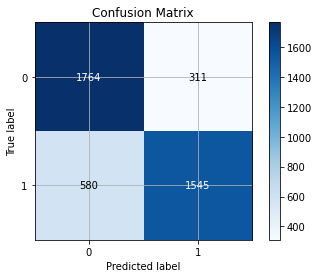

In [34]:
print("Plot Start")
# # Draw the confusion matrix
plotpred=preds
for i in range(len(preds)):
  if preds[i]<=0.5:
    plotpred[i]=0
  else:
    plotpred[i]=1

plot_cmat(yte, plotpred)


In [74]:
tr_rating

array([0.8, 1. , 1. , ..., 0.8, 1. , 1. ])

In [79]:


def clean_data_pred(path,word_bank_text,word_bank_title):
    # data = pd.read_csv("temp.csv", delimiter = ",")
    # data = pd.read_csv(io.BytesIO(uploaded1['amazon_reviews.csv']))
    # data = pd.read_csv("/content/amazon_reviews.csv")
    data = pd.read_csv(path)
    data_const = data

    data.loc[data["VERIFIED_PURCHASE"] == "Y", "VERIFIED_PURCHASE"] = 1
    data.loc[data["VERIFIED_PURCHASE"] == "N", "VERIFIED_PURCHASE"] = 0
    data.loc[data["RATING"] == 0, "RATING"] = 0
    data.loc[data["RATING"] == 1, "RATING"] = 1
    data.loc[data["RATING"] == 2, "RATING"] = 2
    data.loc[data["RATING"] == 3, "RATING"] = 3
    data.loc[data["RATING"] == 4, "RATING"] = 4
    data.loc[data["RATING"] == 5, "RATING"] = 5

    print_rtext=[]
    print_rtitle=[]
    print_rating=[]
    print_vp=[]
    print_label=[]
    clean_text=[]
    clean_title=[]
    # for i in range(len(data)):
    for i in range(len(data)):
        data.loc[i, 'REVIEW_TEXT'] = cleanup(data.loc[i,'REVIEW_TEXT'])
        data.loc[i, 'REVIEW_TITLE'] = cleanup(data.loc[i,'REVIEW_TITLE'])

        # print(data.loc[i,'VERIFIED_PURCHASE'])
        # print(data.loc[i,'RATING'])
        # print(data.loc[i,'REVIEW_TITLE'])
        # print(data.loc[i,'REVIEW_TEXT'])

        # print(data_const.loc[i,'VERIFIED_PURCHASE'])
        # print(data_const.loc[i,'RATING'])
        # print(data_const.loc[i,'REVIEW_TITLE'])
        # print(data_const.loc[i,'REVIEW_TEXT'])
        
        x_temp = data.loc[i, 'REVIEW_TEXT']
        x_pred_text=[]
        x_pred_text.append(x_temp.split())
        for news in x_pred_text:
          ni = 0
          while ni < len(news):
            if news[ni] in word_bank_text:
                news[ni] = word_bank_text[news[ni]]
                ni += 1
            else:
                del news[ni]
        # print(x_pred_text)
        max_review_length = 500
        x_pred_text = sequence.pad_sequences(x_pred_text, maxlen=max_review_length)

        x_temp = data.loc[i, 'REVIEW_TITLE']
        x_pred_title=[]
        x_pred_title.append(x_temp.split())

        # Encode the sentences
        for news in x_pred_title:
            ni = 0
            while ni < len(news):
                if news[ni] in word_bank_title:
                    news[ni] = word_bank_title[news[ni]]
                    ni += 1
                else:
                    del news[ni]
        # print(pred_rating)
        # print(pred_vp)
        max_review_length = 50
        x_pred_title = sequence.pad_sequences(x_pred_title, maxlen=max_review_length)
        pred_vp = (data.loc[i,'VERIFIED_PURCHASE'])
        pred_rtext = np.array(x_pred_text)/8000
        pred_rating = (data.loc[i,'RATING'])/5
        pred_rtitle = np.array(x_pred_title)/8000
        

        pred_rating=np.reshape(pred_rating,1)
        pred_vp=np.reshape(pred_vp,1)
        pred_rtext=np.reshape(pred_rtext,[1,500])
        pred_rtitle=np.reshape(pred_rtitle,[1,50])


        # print(pred_rtext)
        # print(pred_rtitle)
        # print(pred_rating)
        # print(pred_vp)


        # print(pred_rating.shape)
        pred_vp=pred_vp.astype(dtype="int32")
        # pred_rating=pred_rating.astype(dtype="int32")
        # pred_rtitle=pred_rtitle.astype(dtype="int32")
        # pred_rtext=pred_rtext.astype(dtype="int32")

        # print(pred_rtext)
        # print(pred_rtitle)
        # print(pred_rating)
        # print(pred_vp)


        print(i)
        preds_final = model.predict([pred_rtext,pred_rtitle,pred_vp,pred_rating])
        print(preds_final)
        # break
        print_rtext.append(data_const.loc[i,'REVIEW_TEXT'])
        print_vp.append(data_const.loc[i,'VERIFIED_PURCHASE'])
        print_rtitle.append(data_const.loc[i,'REVIEW_TITLE'])
        print_rating.append(data_const.loc[i,'RATING'])
        clean_text.append(pred_rtext)
        clean_title.append(pred_rtitle)
        print_label.append(preds_final)

    return (print_vp,print_rtext,print_rtitle,print_rating,print_label,clean_text,clean_title)


In [80]:

print_vp,print_rtext,print_rtitle,print_rating,print_label,clean_text,clean_title = clean_data_pred("Data_Pred.csv",word_bank_text,work_bank_title)

print_label_01=print_label
for i in range(len(print_label)):
  if print_label[i]<=0.5:
    print_label_01[i]=0
  else:
    print_label_01[i]=1



Streaming output truncated to the last 5000 lines.
[[0.24518587]]
31887
[[0.24518587]]
31888
[[0.24518587]]
31889
[[0.24518587]]
31890
[[0.24518587]]
31891
[[0.24518587]]
31892
[[0.24518587]]
31893
[[0.24518587]]
31894
[[0.24518587]]
31895
[[0.24518587]]
31896
[[0.24518587]]
31897
[[0.24518587]]
31898
[[0.24518587]]
31899
[[0.24518587]]
31900
[[0.24518587]]
31901
[[0.24518587]]
31902
[[0.24518587]]
31903
[[0.24518587]]
31904
[[0.24518587]]
31905
[[0.24518587]]
31906
[[0.24518587]]
31907
[[0.24518587]]
31908
[[0.24518587]]
31909
[[0.24518587]]
31910
[[0.24518587]]
31911
[[0.24518587]]
31912
[[0.24518587]]
31913
[[0.24518587]]
31914
[[0.24518587]]
31915
[[0.24518587]]
31916
[[0.24518587]]
31917
[[0.24518587]]
31918
[[0.24518587]]
31919
[[0.24518587]]
31920
[[0.24518587]]
31921
[[0.24518587]]
31922
[[0.24518587]]
31923
[[0.24518587]]
31924
[[0.24518587]]
31925
[[0.24518587]]
31926
[[0.24518587]]
31927
[[0.24518587]]
31928
[[0.24518587]]
31929
[[0.24518587]]
31930
[[0.24518587]]
31931
[[0.

In [85]:
import csv
rowi=0
with open("Data_Pred.csv", "r" ) as cfile:
  reader = csv.reader(cfile)
  with open("Data_Pred_final.csv", "w") as cwrite:
    writer = csv.writer(cwrite)
    for i in reader:
      try:
        writer.writerow([print_rtext[rowi],print_rtitle[rowi],print_rating[rowi],print_vp[rowi],print_label[rowi],clean_text[rowi],clean_title[rowi]])
        rowi=rowi+1
        print(rowi)
      except:
        print("Done")

Streaming output truncated to the last 5000 lines.
29389
29390
29391
29392
29393
29394
29395
29396
29397
29398
29399
29400
29401
29402
29403
29404
29405
29406
29407
29408
29409
29410
29411
29412
29413
29414
29415
29416
29417
29418
29419
29420
29421
29422
29423
29424
29425
29426
29427
29428
29429
29430
29431
29432
29433
29434
29435
29436
29437
29438
29439
29440
29441
29442
29443
29444
29445
29446
29447
29448
29449
29450
29451
29452
29453
29454
29455
29456
29457
29458
29459
29460
29461
29462
29463
29464
29465
29466
29467
29468
29469
29470
29471
29472
29473
29474
29475
29476
29477
29478
29479
29480
29481
29482
29483
29484
29485
29486
29487
29488
29489
29490
29491
29492
29493
29494
29495
29496
29497
29498
29499
29500
29501
29502
29503
29504
29505
29506
29507
29508
29509
29510
29511
29512
29513
29514
29515
29516
29517
29518
29519
29520
29521
29522
29523
29524
29525
29526
29527
29528
29529
29530
29531
29532
29533
29534
29535
29536
29537
29538
29539
29540
29541
29542
29543
29544
29545
29546
2